In [50]:
pip install ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipynb.fs.defs import task1
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, r_regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, mean_squared_error, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

In [27]:
def plot_multiclass_precision_recall_curve(y_true, dec_values, title):
    plt.figure(figsize=(8, 6))
    
    for class_label in range(10):
        precision = dict()
        recall = dict()
        
        # Compute precision and recall for the current class
        precision[class_label], recall[class_label], _ = precision_recall_curve(y_true == class_label, dec_values[:, class_label])
        
        # Plot precision-recall curve for the current class
        plt.plot(recall[class_label], precision[class_label], label=f"Class {class_label}")

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Load task 3.2 model
with open('3_2.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [15]:
# Load the dataset
x_train, y_train, x_test, y_test = task1.load_data()

In [16]:
# Normalise/rescale the dataset
mms1 = MinMaxScaler(feature_range=(0, 1))
mms2 = MinMaxScaler(feature_range=(10, 15))
x_train_norm1 = mms1.fit_transform(x_train)
x_test_norm1 = mms1.transform(x_test)
x_train_norm2 = mms2.fit_transform(x_train)
x_test_norm2 = mms2.transform(x_test)

In [17]:
# Classifier from task 3.2
clf1 = MLPClassifier()
clf1.fit(x_train_norm1, y_train) 
# Classifier rescaled 
clf2 = MLPClassifier()
clf2.fit(x_train_norm2, y_train)

MLPClassifier()

In [5]:
print('Training Accuracy (0-1): ', clf1.score(x_train_norm1, y_train)) 
print('Testing Accuracy (0-1): ', clf1.score(x_test_norm1, y_test)) 
print('Training Accuracy (10-15): ', clf2.score(x_train_norm2, y_train))
print('Testing Accuracy (10-15): ', clf2.score(x_test_norm2, y_test))

Training Accuracy (0-1):  1.0
Testing Accuracy (0-1):  0.9264814814814815
Training Accuracy (10-15):  0.8574074074074074
Testing Accuracy (10-15):  0.8501851851851852


In [18]:
# Get predictions
y_pred1 = clf1.predict(x_test_norm1)
y_pred2 = clf2.predict(x_test_norm2)

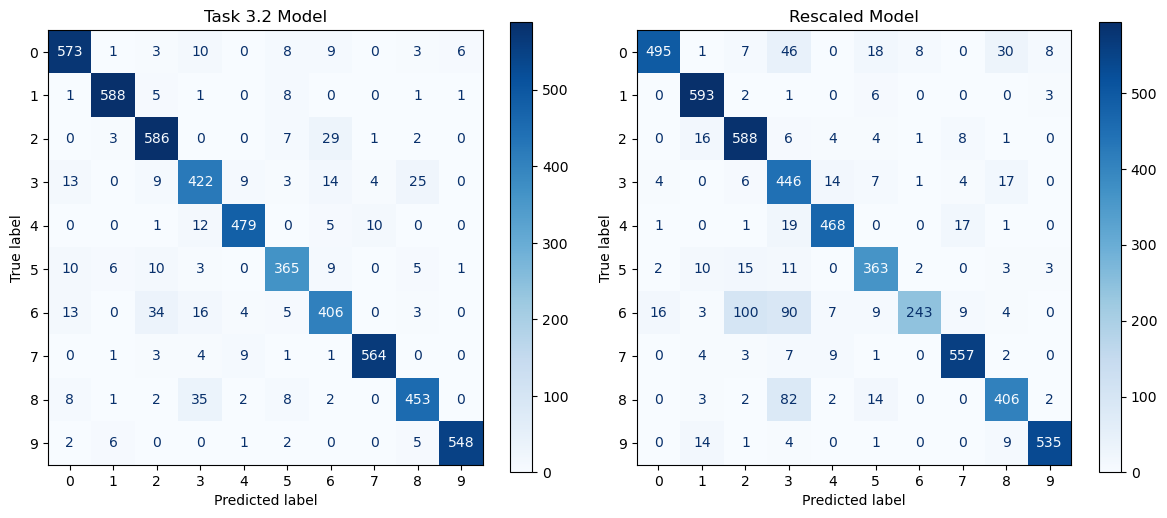

In [19]:
# Calculate confusion matrices
cmd1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred1))
cmd2 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2))

# Plot confusion matrices side by side
task1.plot_side_by_side(cmd1, cmd2, 'Task 3.2 Model', 'Rescaled Model')

In [20]:
# Calculate precision scores
prec1 = precision_score(y_test, y_pred1, average='micro')
prec2 = precision_score(y_test, y_pred2, average='micro')
print('Precision Score (0-1): ', prec1)
print('Precision Score (10-15): ', prec2)

Precision Score (0-1):  0.922962962962963
Precision Score (10-15):  0.8692592592592593


In [21]:
# Calculate recall scores
rec1 = recall_score(y_test, y_pred1, average='micro')
rec2 = recall_score(y_test, y_pred2, average='micro')
print('Recall Score (0-1): ', rec1)
print('Recall Score (10-15): ', rec2)

Recall Score (0-1):  0.922962962962963
Recall Score (10-15):  0.8692592592592593


In [22]:
# Calculate F1 scores
f1_1 = f1_score(y_test, y_pred1, average='micro')
f1_2 = f1_score(y_test, y_pred2, average='micro')
print('F1 Score (0-1): ', f1_1)
print('F1 Score (10-15): ', f1_2)

F1 Score (0-1):  0.922962962962963
F1 Score (10-15):  0.8692592592592593


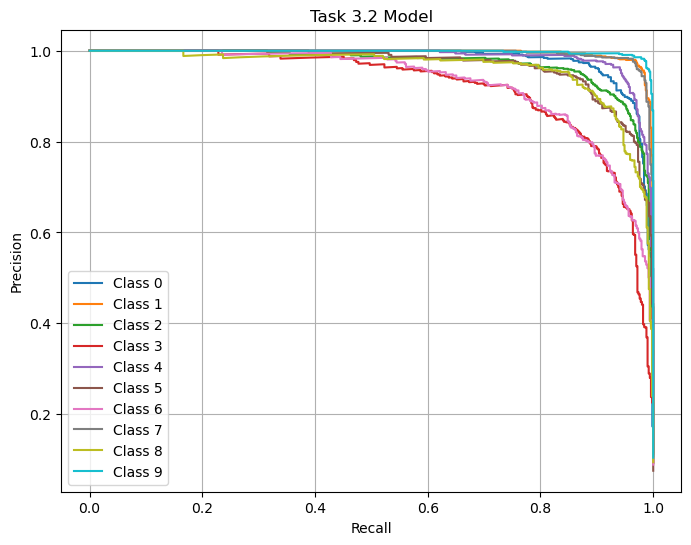

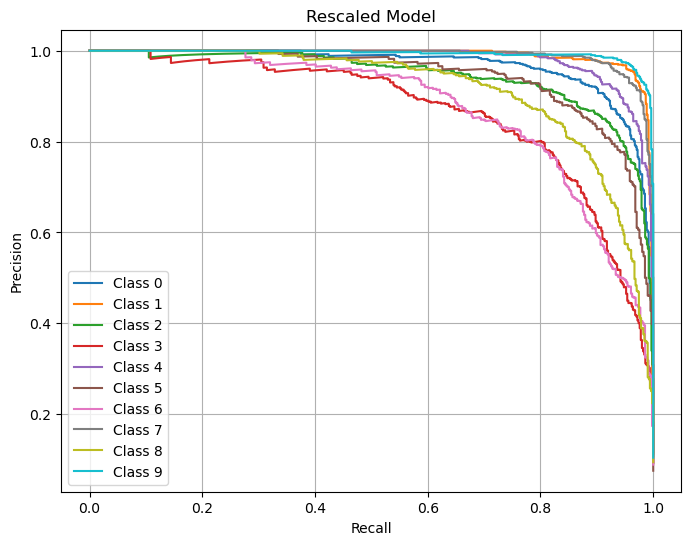

In [29]:
# Estimate the SVM output for each sample in your testing split
dec_value1 = clf1.predict_proba(x_test_norm1)
dec_value2 = clf2.predict_proba(x_test_norm2)
prc1 = plot_multiclass_precision_recall_curve(y_test, dec_value1, 'Task 3.2 Model')
prc2 = plot_multiclass_precision_recall_curve(y_test, dec_value2, 'Rescaled Model')

In [30]:
# Compute cross-validation results
mlp_scores1 = cross_val_score(clf1, x_test_norm1, y_test, cv=10)
mlp_scores2 = cross_val_score(clf2, x_test_norm2, y_test, cv=10)

In [31]:
# Perform paired t-test
t_statistic, p_value = ttest_rel(mlp_scores1, mlp_scores2)
print("Paired t-test results: t-statistic = {:.4f}, p-value = {:.4f}".format(t_statistic, p_value))

Paired t-test results: t-statistic = 6.9474, p-value = 0.0001


In [ ]:
# This cell lists code for couple of different models that worked better than the original SVR
# Attempt 1
clf2 = SVC(kernel='precomputed')
clf2.fit(x_train_norm, y_train)
print(f'Attempt 1: {clf2.score(x_test_norm, y_test)}')

# Attempt 2
clf3 = SVC(kernel='poly', degree=3)
clf3.fit(x_train_norm, y_train)
print(f'Attempt 2: {clf3.score(x_test_norm, y_test)}')

# Attempt 3
clf4 = SVC(kernel='sigmoid')
clf4.fit(x_train_norm, y_train)
print(f'Attempt 3: {clf4.score(x_test_norm, y_test)}')

ii) This rejected the null hypothesis that the 10 samples of scores have identical average expected values. Given a 6.9474 t-statistic value, the confidence level is about 99.9%. A higher confidence level implies a greater level of certainty that there is a difference in performance. If we observe a very small p-value (0.0001 in our case), then we can reject the null hypothesis of identical average scores. Small p-values are associated with large t-statistics.